In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Adaptive Gradient Descent Algorithm

Why do we need adaptive gradient descent?<br>
1. We want an adaptive learning rate at times. If the slope of the loss curve is very steep at some time,<br>
    we wish for a small learning rate whereas if erros surface at somt point flat, we want the learning rate to be higher
2. If a sparse feature turns out to be very imporatnt we want a higher lr for it
    - During gradient descent the probability of the feature to get updated is low as the batch selected may have all <br>
        0 values corresponding to the feature.
    - Even if there is an update the update could be very small as most of the example of the batch has very few non-zero values<br>
Hence we sould like to compensate this small gradient value with large learning rate.

**AdaGrad** <https://youtu.be/WSvxne3oGr0?list=PLZ2ps__7DhBZVxMrSkTIcG6zZBDKUXCnM&t=292> <br>
Based on the given premise we want to device an algorithm which can compensate a sparse feature with larger learning rate<br>
The update rule for ada grad is given by
$$
    v_t = v_{t-1} + (\nabla w_t)^2\\
    w_{t+1} = v_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
$$
$v_t$ tracks the history of updates. The neurons which gets updated rarely or get updated by small quantity are compensated in the second eq.<br>

DISADVANTAGES<br>
1. The optimization process is a bit slow as this method do not use concept of momentum.
2. After certain iteration when ther term $v_t$ accumulates some history, the learning process slows down as the value of $v_t$ starts to increase.<br>This is particularly true for dense feature. 


**RMSProp** <https://www.youtube.com/watch?v=ubOy0NPI2cY&list=PLZ2ps__7DhBZVxMrSkTIcG6zZBDKUXCnM&index=39> <br>
1. To reduce the monotonic decay of learning rate of adagrad, rmsprop introduced a scaling term. The equation is given by
$$
    \begin{align*}
        v_t &= \beta v_{t-1} + (1-\beta)(\nabla w_t)^2\\
        w_{t+1} &= v_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
1. Upon expanding the $v_t$ term we can see that more weightage is given to recent gradient values.
2. Unlike the adagrad the accumulation of weights ($v_t$) can decrease after some iteration. This leads to stability of learning rate.
3. With the stability of learning rate it brings the problem of oscillation around the local minima. This can be fixed with proper<br>
    initialization of initial learning rate.
4. Proper initialization of learning rate is not trivial. This is a trial and error process which is often not feasible.

**AdaGrad**<br>
1. Adaptive Gradient algorithm
2. Decay the learning rate inversely proportional to the update history. The more the upadate the less the leraning rate.
$$
    \begin{align*}
        v_t &= v_{t-1} + (\nabla w_t)^2\\
        w_{t+1} &= w_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
3. There is no momentum term in AdaGrad. The convergence is slower compared to momtnum based algorithms.
4. As it comes toward convergence, the convergence speed decreases.

**RMS Prop**<br>
1. AdaGrad decreases the learning rate very aggressively as a result the frequent parameters will get very small updates due to decaying learning rate.
2. RMSProp tries to solve the problem with decaying the denominator term.
$$
    \begin{align*}
        v_t &= \beta v_{t-1} + (1-\beta)(\nabla w_t)^2\\
        w_{t+1} &= w_t - \frac{\eta}{\sqrt{v_t+\epsilon}}\nabla w_t
    \end{align*}
$$
Expanding the v terms we have

$$
    v_3 = 0.08*v_0 + 0.09*v_1 + 0.1*v_2
$$
3. High oscillation once it reaches neighbourhood of minima. 
4.

# visualizing gradient descent
1. Try to learn sigmoid function using a single neuron.
2. Stochastic Gradient Descent to optimize the learning function.

In [8]:
class VisualizeGradientDescent:
    def __init__(self):
        self.w = None   # weights
        self.b = None   # bias
        self.losses = []
        self.ws = []
        self.bs = []

def function(z):
    out = np.exp(z)/(1+np.exp(z))
    return out
    
def grad_w(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = -x*(y-fz)*(1-fz)*fz
    return out
    
def grad_b(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = -(y-fz)*fz* (1-fz)
    return out
    
def cal_loss(w, b, x, y):
    z = w*x+b
    fz = function(z)
    out = (y-fz)**2
    return out

In [9]:
# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 1)
y = function(X)

In [10]:
w = np.linspace(-5, 5, 100)
b = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w, b)

losses = np.zeros_like(W)
for i in range(len(W)):
    for j in range(len(W[i])):
        y_hat = function(W[i, j]*X + B[i, j])
        loss = np.mean((y-y_hat)**2)
        losses[i, j] = loss

In [11]:
def calculate_gradient(model, X, Y):
    dw, db, loss = 0, 0, 0
    n = len(X)

    for x, y in zip(X, Y):
        dw += grad_w(model.w, model.b, x, y)
        db += grad_b(model.w, model.b, x, y)
        loss += cal_loss(model.w, model.b, x, y)
    return loss/n, dw, db

In [12]:
# Implementation of momentum based gradient descent
def momentum_gradient_descent(model, w0, b0, x, y, lr=0.1, beta=0.9, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    beta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    
    
    v = 0
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)
        w_v = beta * v + (1-beta) * dw
        w_b = beta * v + (1-beta) * db
        model.w = model.w - lr * w_v
        model.b = model.b - lr * w_b

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [13]:
def ada_grad(model, w0, b0, x, y, lr=0.1, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    eta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    
    w_v = 0
    w_b = 0
    eps = 1e-6
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)

        w_v = w_v + dw**2
        w_b = w_b + db**2
        model.w = model.w - (lr/np.sqrt(w_v+eps)) * dw
        model.b = model.b - (lr/np.sqrt(w_b+eps)) * db

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [36]:
def rms_prop(model, w0, b0, x, y, lr=0.1, n_epoch=100):
    """
    x0: Initial value of x.
    lr: learning rate.
    eta: Momentum value.
    n_iter: No. of iteration.
    """
    # Initialize model parameters
    model.w = w0        # Initialize wwights
    model.b = b0        # Initialize bias
    model.losses = []   # Remove previous losses, weights and biases
    model.ws = []
    model.bs = []
    model.dws = []
    model.w_vs = []
    model.w_lrs = []
    
    w_v = 0
    w_b = 0
    eps = 1e-6
    beta = 0.9
    prev_loss = np.inf
    for i in range(n_epoch):
        loss, dw, db = calculate_gradient(model, x, y)

        w_v = beta * w_v + (1 - beta) * dw**2
        w_b = beta * w_b + (1 - beta) * db**2

        w_lr = (lr/np.sqrt(w_v+eps))
        b_lr = (lr/np.sqrt(w_b+eps))
        
        model.w = model.w - w_lr * dw
        model.b = model.b - b_lr * db

        model.losses.append(loss)
        model.ws.append(model.w)
        model.bs.append(model.b)
        model.dws.append(dw)
        model.w_vs.append(w_v)
        model.w_lrs.append((lr/np.sqrt(w_v+eps)))

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [15]:
def sgd(model, w0, b0, x, y, epochs=100, lr=1):
    # Initialize model parameters
    model.w = w0
    model.b = b0
    model.losses = []
    model.ws = []
    model.bs = []

    prev_loss = np.inf
    for _ in range(epochs):
        loss, dw, db = calculate_gradient(model, x, y)
        model.w = model.w - lr * dw
        model.b = model.b - lr * db

        model.ws.append(model.w)
        model.bs.append(model.b)
        model.losses.append(loss)

        if np.abs(prev_loss - loss) < 1e-10:
            break

        prev_loss = loss

In [16]:
def visualize_optimization(model):
    cm = plt.colormaps.get_cmap('viridis')
    plt.scatter(W, B, c=losses, cmap=cm)
    cp = plt.contour(W, B, losses, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(W, B, losses)
    for w, b in zip(model.ws, model.bs):
        plt.scatter(w, b, c='w', marker='*')
    plt.xlabel('W')
    plt.ylabel('B')
    plt.show()

In [34]:
model_sgd = VisualizeGradientDescent()
model_momentum = VisualizeGradientDescent()
model_adagrad =  VisualizeGradientDescent()
model_rms = VisualizeGradientDescent()

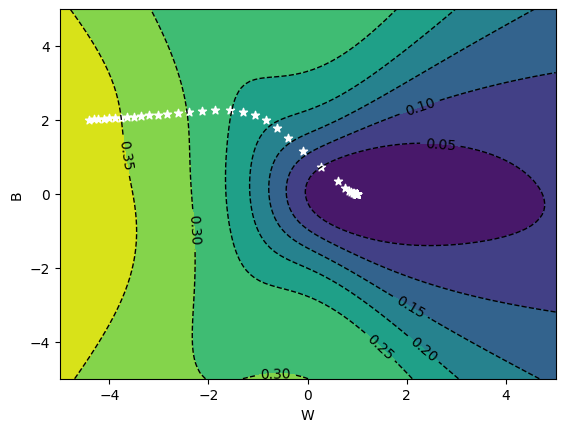

In [18]:
sgd(model_sgd, -4.5, 2, X, y, lr=0.1)
visualize_optimization(model_sgd)

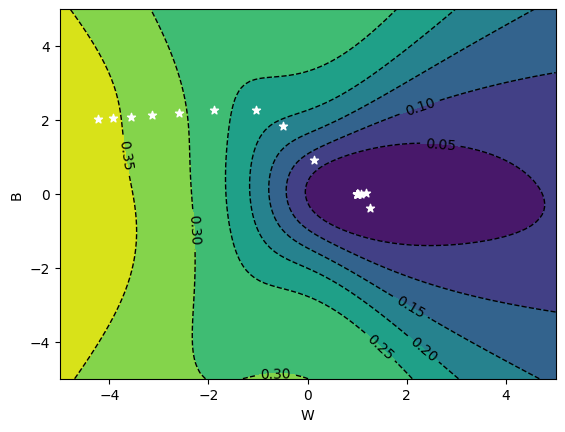

In [19]:
momentum_gradient_descent(model_momentum, -4.5, 2, X, y, lr=3)
visualize_optimization(model_momentum)

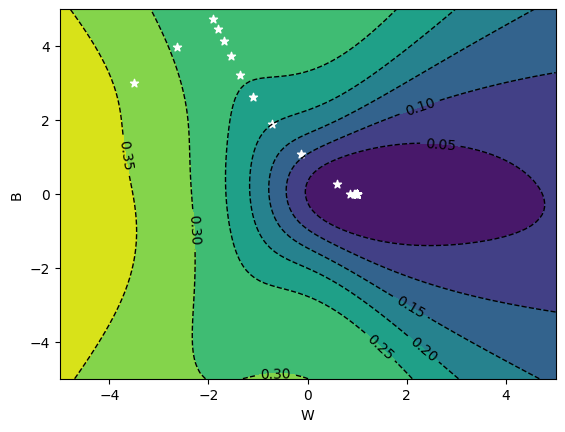

In [20]:
ada_grad(model_adagrad, -4.5, 2, X, y, lr=1)
visualize_optimization(model_adagrad)

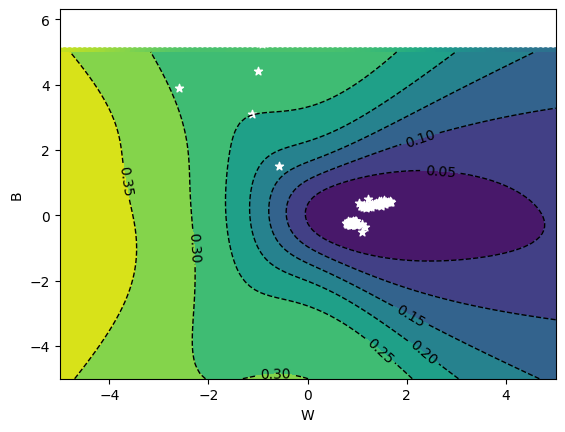

In [37]:
rms_prop(model_rms, -4.5, 2, X, y, lr=0.6)
visualize_optimization(model_rms)

In [32]:
print('Steps required by vanilla GD: ', len(model_sgd.losses))
print('Steps required by momentum based GD: ', len(model_momentum.losses))
print('Steps required by adagrad GD: ', len(model_adagrad.losses))  # Slower compared to momentum based optimizers as there is no momentum term.
print('Steps required by rms prop GD: ', len(model_rms.losses))     # Has a tendency to oscillate once it reaches neighbourhood of minima.

Steps required by vanilla GD:  57
Steps required by momentum based GD:  20
Steps required by adagrad GD:  28
Steps required by rms prop GD:  100


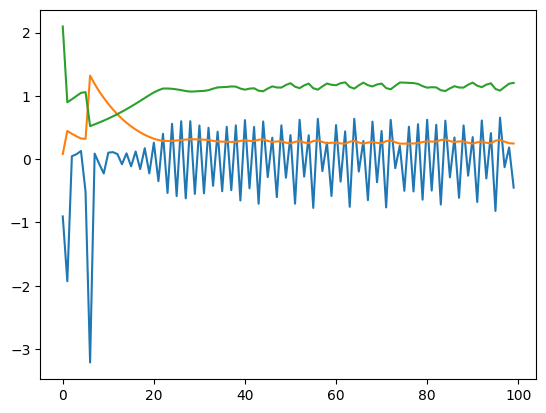

In [38]:
# Oscillation in RMSProp
# The phenomenoa of constant learning rate
plt.plot(model_rms.dws)
plt.plot(model_rms.w_vs)
plt.plot(model_rms.w_lrs)